# Problem Statement
* Perform the data clustering algorithm using any Clustering algorithm.

In [9]:
# Import Libraries
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

# # Generate Sample Data
# X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# # Visualize the Data
# plt.scatter(X[:, 0], X[:, 1], s=50)
# plt.title("Raw Data")
# plt.show()

# # Find Optimal Clusters Using the Elbow Method
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

# # Apply K-means with Optimal Clusters (k=3)
# kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
# kmeans.fit(X)
# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

# # Visualize Clusters
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
# plt.title("K-means Clustering")
# plt.show()

## Prepare Dataset

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3)

### Visualize Dataset

In [11]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

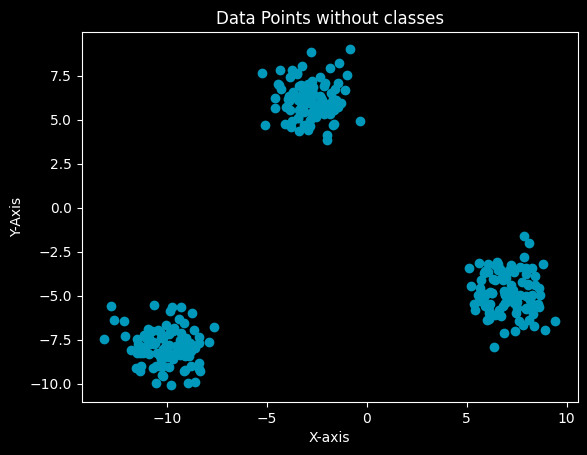

In [12]:
plt.scatter(X[:,0],X[:,1],c='#0099bb')
plt.title('Data Points without classes')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');

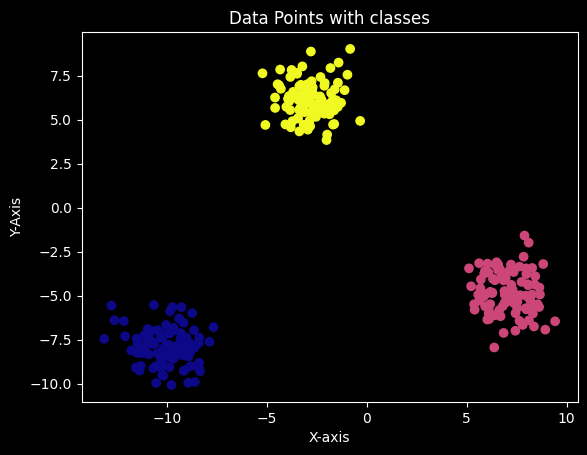

In [13]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma')
plt.title('Data Points with classes')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');

## Apply Clustering Model

### Determining The Elbow Point

C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans

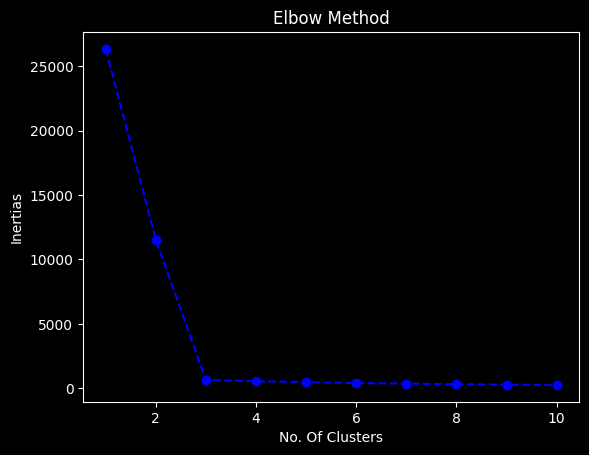

In [14]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1,11), inertias, '--ob')
plt.title('Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('Inertias');

### Determining ideal number of clusters (Programmatically)

In [15]:
threashold = 100
prev = None
ideal_n_clusters = None
for n_clusters, inertia in enumerate(inertias,start=1):
    if prev:
        if prev - inertia > threashold:
            ideal_n_clusters = n_clusters
    prev = inertia

ideal_n_clusters

3

### Applying KMeans with ideal number of clusters

C:\Users\jayes\.vscode\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


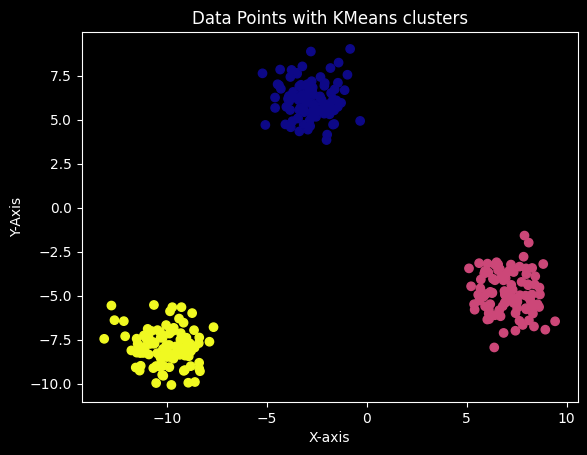

In [16]:
model = KMeans(n_clusters=ideal_n_clusters)

model.fit(X)

plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap='plasma')
plt.title('Data Points with KMeans clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');